In [2]:
# Clone the repository
!git clone https://github.com/alessioborgi/StyleAlignedDiffModels.git

# Change directory to the cloned repository
%cd StyleAlignedDiffModels

# Install the required packages
!pip install -r requirements.txt > /dev/null


Cloning into 'StyleAlignedDiffModels'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 32 (delta 10), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (32/32), 5.15 MiB | 5.65 MiB/s, done.
/kaggle/working/StyleAlignedDiffModels


In [3]:
!pip install gradio > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
distributed 2023.7.1 requires dask==2023.7.1, but you have dask 2024.4.1 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.
kfp 2.5.0 requires urllib3<2.0.0, but you have urllib3 2.2.1 which is incompatible.
raft-dask 23.8.0 requires dask==2023.7.1, but you have dask 2024.4.1 which is incompatible.
spacy 3.7.3 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 w

In [4]:
from diffusers import StableDiffusionXLPipeline, DDIMScheduler
import torch
torch.cuda.empty_cache()
import mediapy
import sa_handler
import gradio as gr

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-05-21 13:30:23.195456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 13:30:23.195554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 13:30:23.314976: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# init models

scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False,
                              set_alpha_to_one=False)
pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
    scheduler=scheduler
).to("cuda")

handler = sa_handler.Handler(pipeline)
sa_args = sa_handler.StyleAlignedArgs(share_group_norm=False,
                                      share_layer_norm=False,
                                      share_attention=True,
                                      adain_queries=True,
                                      adain_keys=True,
                                      adain_values=False,
                                     )

handler.register(sa_args, )

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   6728 MiB |   6728 MiB |   6728 MiB |      0 B   |\n|       from large pool |   6653 MiB |   6653 MiB |   6653 MiB |      0 B   |\n|       from small pool |     74 MiB |     74 MiB |     74 MiB |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |   6728 MiB |   6728 MiB |   6728 MiB |      0 B   |\n|       from large pool |   6653 MiB |   6653 MiB |

  0%|          | 0/50 [00:00<?, ?it/s]

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   6733 MiB |   9946 MiB |   1884 GiB |   1877 GiB |
|       from large pool |   6658 MiB |   9865 MiB |   1865 GiB |   1858 GiB |
|       from small pool |     74 MiB |     83 MiB |     18 GiB |     18 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   6733 MiB |   9946 MiB |   1884 GiB |   1877 GiB |
|       from large pool |   6658 MiB |   9865 MiB |   1865 GiB |

  0%|          | 0/50 [00:00<?, ?it/s]

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   6734 MiB |   9946 MiB |   3766 GiB |   3759 GiB |
|       from large pool |   6659 MiB |   9865 MiB |   3728 GiB |   3722 GiB |
|       from small pool |     74 MiB |     83 MiB |     37 GiB |     37 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   6734 MiB |   9946 MiB |   3766 GiB |   3759 GiB |
|       from large pool |   6659 MiB |   9865 MiB |   3728 GiB |

  0%|          | 0/50 [00:00<?, ?it/s]

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   6734 MiB |   9946 MiB |   5651 GiB |   5645 GiB |
|       from large pool |   6659 MiB |   9865 MiB |   5595 GiB |   5589 GiB |
|       from small pool |     74 MiB |     83 MiB |     56 GiB |     55 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   6734 MiB |   9946 MiB |   5651 GiB |   5645 GiB |
|       from large pool |   6659 MiB |   9865 MiB |   5595 GiB |

  0%|          | 0/50 [00:00<?, ?it/s]

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   6733 MiB |   9946 MiB |   7542 GiB |   7535 GiB |
|       from large pool |   6658 MiB |   9865 MiB |   7467 GiB |   7460 GiB |
|       from small pool |     74 MiB |     83 MiB |     74 GiB |     74 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   6733 MiB |   9946 MiB |   7542 GiB |   7535 GiB |
|       from large pool |   6658 MiB |   9865 MiB |   7467 GiB |

  0%|          | 0/50 [00:00<?, ?it/s]

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   6733 MiB |   9946 MiB |   9422 GiB |   9415 GiB |
|       from large pool |   6658 MiB |   9865 MiB |   9328 GiB |   9322 GiB |
|       from small pool |     74 MiB |     83 MiB |     93 GiB |     93 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   6733 MiB |   9946 MiB |   9422 GiB |   9415 GiB |
|       from large pool |   6658 MiB |   9865 MiB |   9328 GiB |


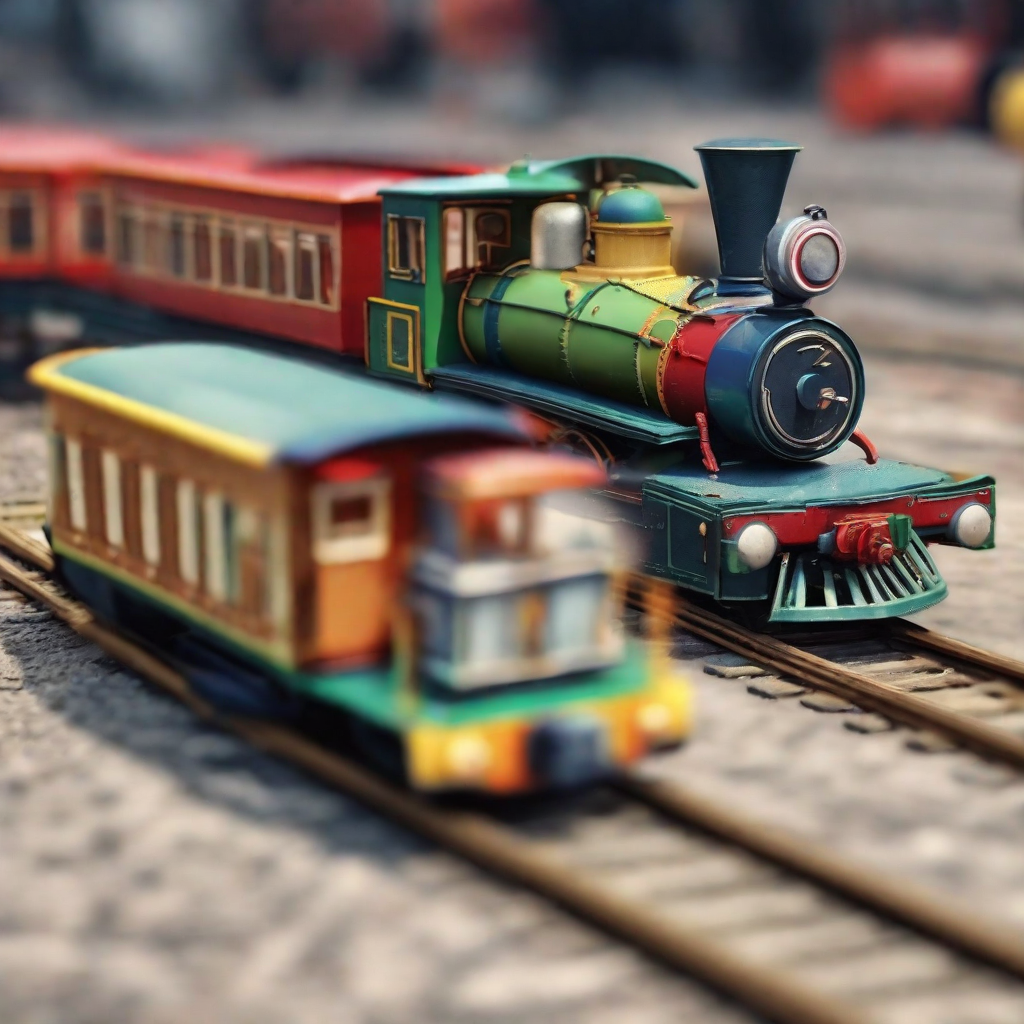
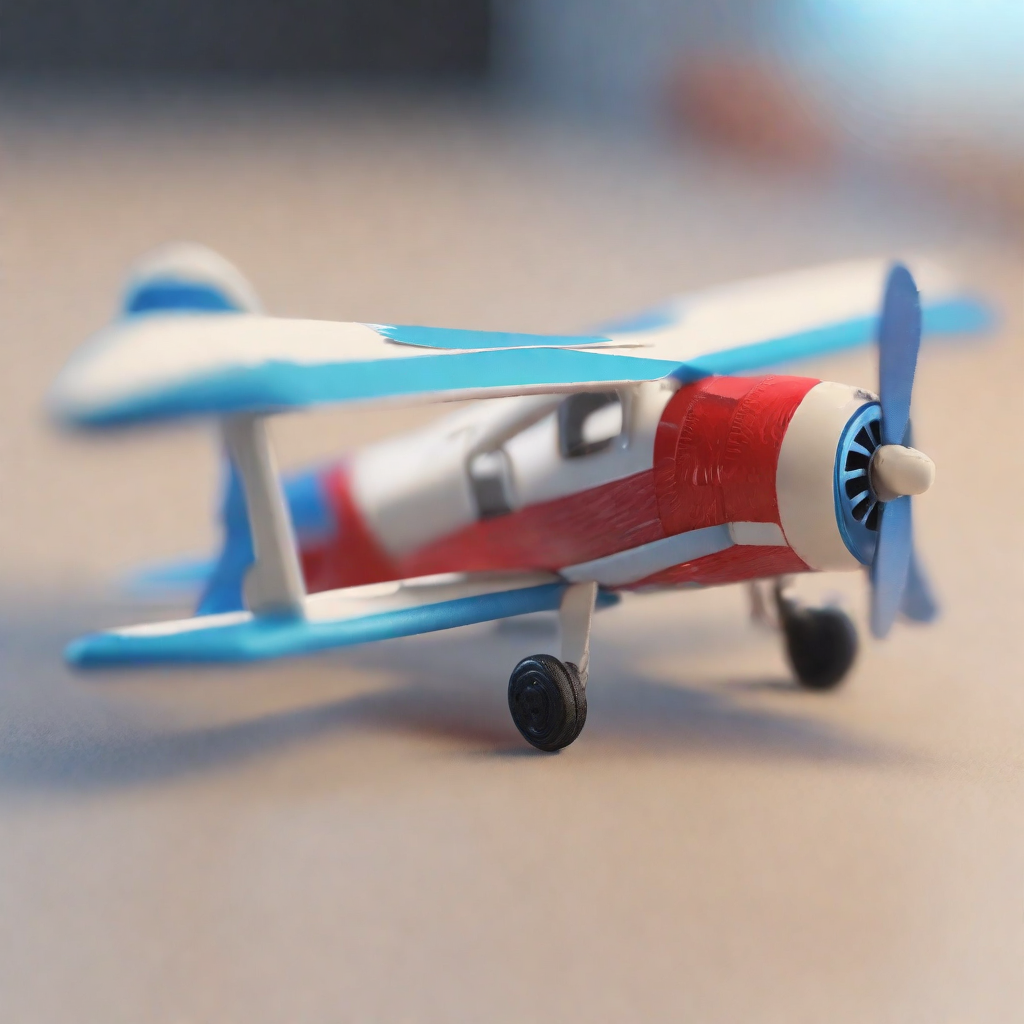
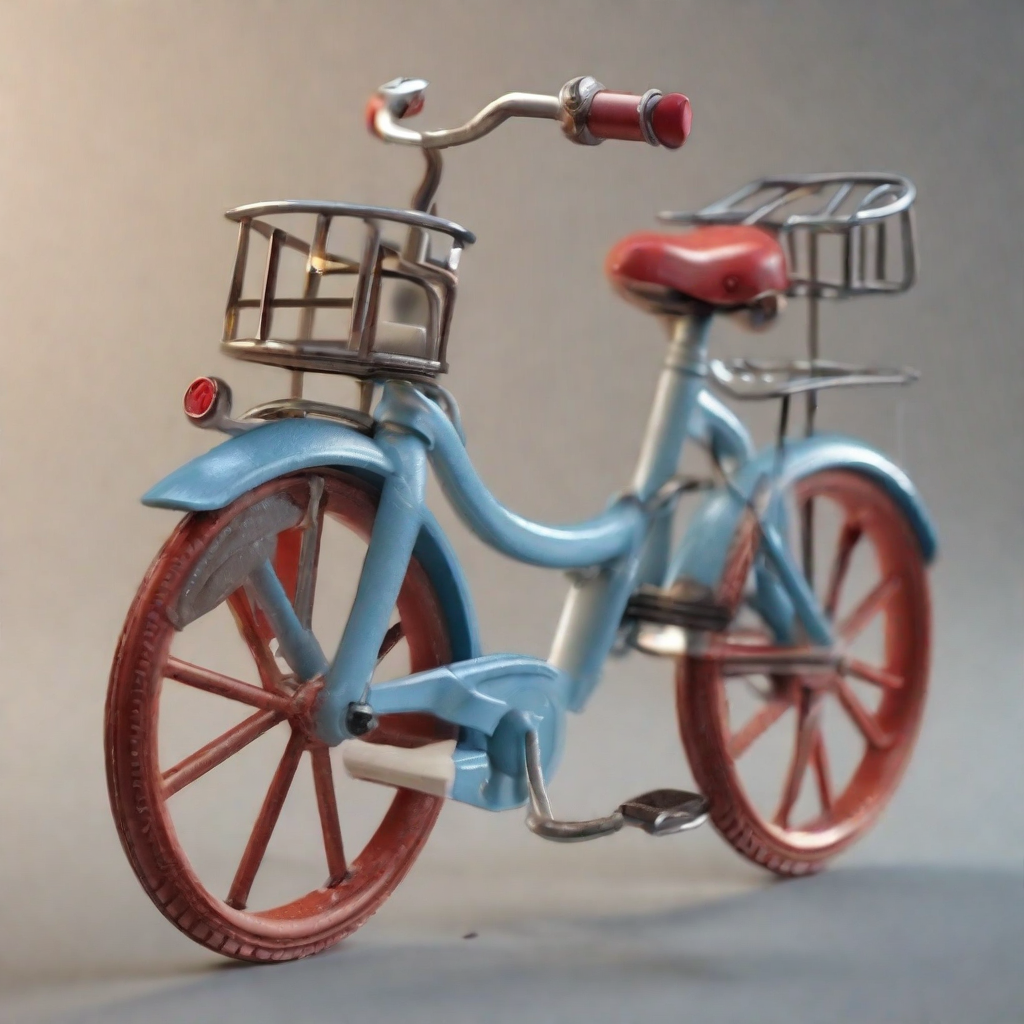
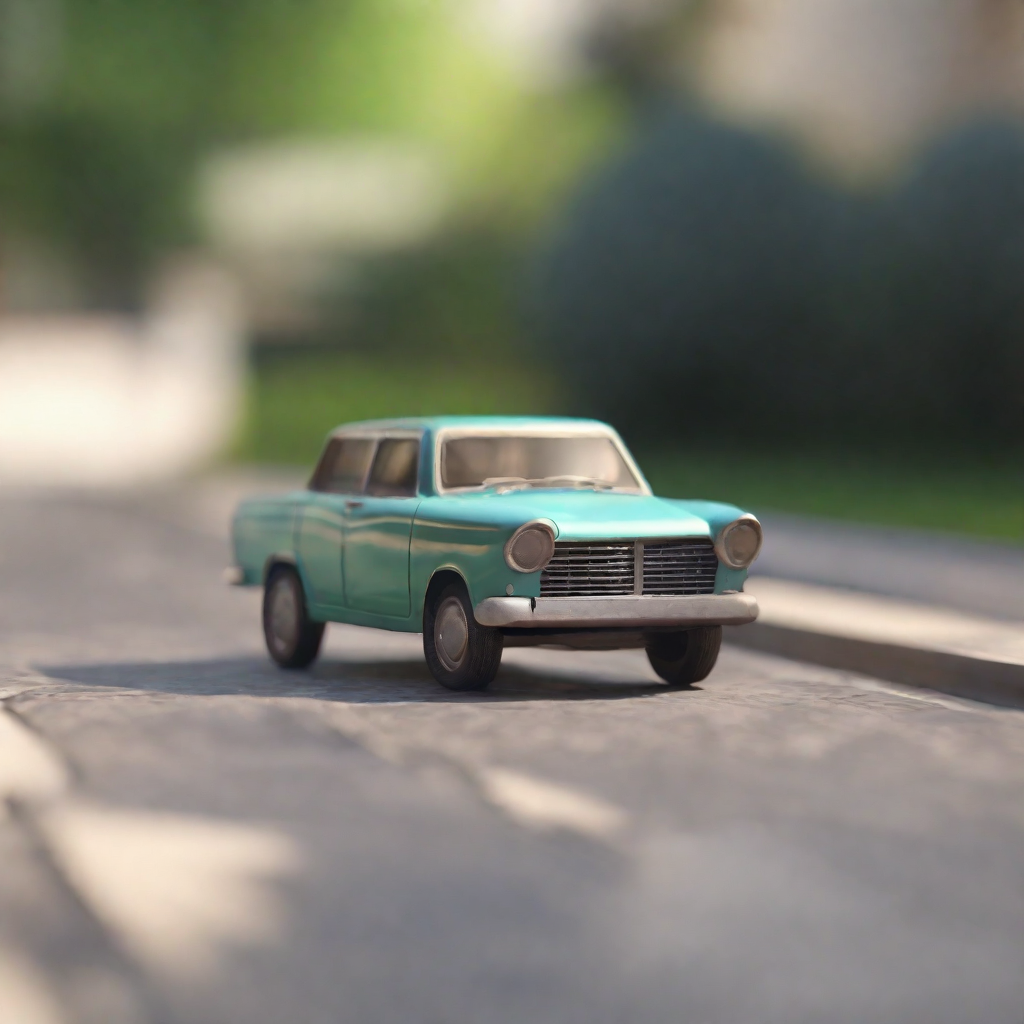
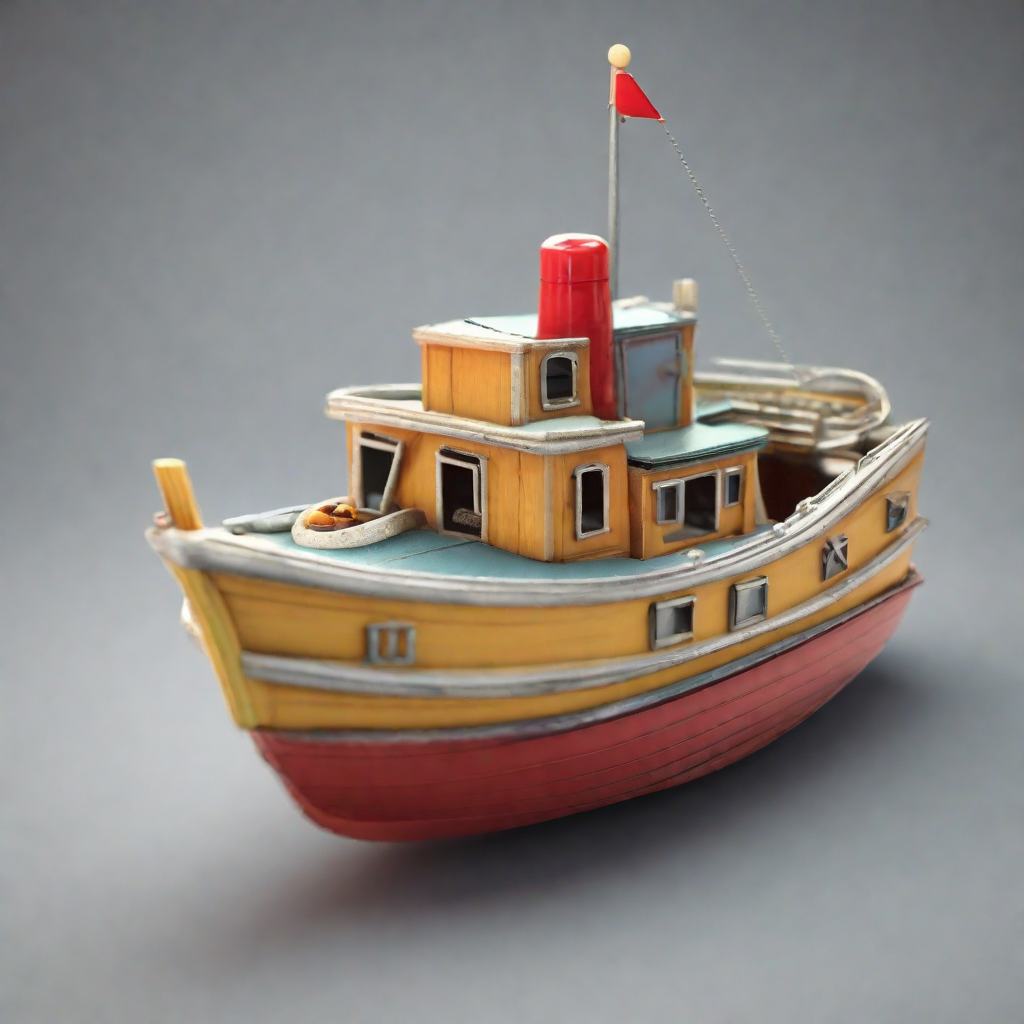

In [7]:
# run StyleAligned
sets_of_prompts = [
  "a toy train. macro photo. 3d game asset",
  "a toy airplane. macro photo. 3d game asset",
  #"a toy bicycle. macro photo. 3d game asset",
  #"a toy car. macro photo. 3d game asset",
  #"a toy boat. macro photo. 3d game asset",
]

images = []
for prompt in sets_of_prompts:
    # Generate image for each prompt individually
    image = pipeline([prompt]).images[0]
    images.append(image)
    # Clear CUDA cache to free memory
    torch.cuda.empty_cache()
    print(torch.cuda.memory_summary(device=None, abbreviated=False))
    
mediapy.show_images(images)

Suggestions for Improving Results
Enhanced Attention Mechanisms:

Multi-Head Attention Optimization: Fine-tuning the number of attention heads and the way they share information could improve style consistency and reduce content leakage.
Dynamic Attention Sharing: Implementing a dynamic mechanism that adjusts the level of attention sharing based on the complexity of the input text and style might lead to better results.
Advanced Normalization Techniques:

Layer-wise AdaIN: Instead of a single AdaIN operation, applying layer-wise adaptive normalization could better capture and transfer intricate style details.
Combining Normalization Methods: Experiment with combining AdaIN with other normalization techniques like batch normalization or instance normalization to see if it enhances style transfer.
Incorporating Contextual Information:

Contextual Embeddings: Use contextual embeddings from large language models to provide additional information during the attention process, which might improve the alignment of complex styles.
Cross-Modal Attention: Integrate cross-modal attention mechanisms that consider both textual and visual contexts simultaneously, enhancing the model's ability to capture and maintain style consistency.
Architectural Modifications
Modular Attention Layers:

Plug-and-Play Attention Modules: Design modular attention layers that can be easily plugged into different parts of the network, allowing for flexible experimentation with where and how attention is shared.
Hierarchical Attention: Implement a hierarchical attention mechanism where different levels of the network focus on different aspects of style and content, ensuring a more granular alignment.
Enhanced U-Net Architecture:

Deeper U-Net: Extend the depth of the U-Net architecture used in the diffusion process to capture more detailed features at multiple scales, which could improve the richness of the generated styles.
Skip Connections with Style Information: Incorporate skip connections that carry style information directly from the input to deeper layers of the network, preserving style details more effectively.
Integration with Generative Adversarial Networks (GANs):

Hybrid Diffusion-GAN Model: Combine the diffusion model with a GAN to leverage the strengths of both architectures. The GAN could help refine the generated images and further enforce style consistency.
Discriminator Focused on Style: Train a style-focused discriminator in the GAN setup that specifically evaluates the style consistency of generated images, providing more direct feedback during training.

In [5]:
# init models
scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False,
                              set_alpha_to_one=False)
pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
    scheduler=scheduler
).to("cuda")
# Configure the pipeline for CPU offloading and VAE slicing#pipeline.enable_sequential_cpu_offload()
pipeline.enable_model_cpu_offload() 
pipeline.enable_vae_slicing()
# Initialize the style-aligned handler
handler = sa_handler.Handler(pipeline)
sa_args = sa_handler.StyleAlignedArgs(share_group_norm=False,
                                      share_layer_norm=False,
                                      share_attention=True,
                                      adain_queries=True,
                                      adain_keys=True,
                                      adain_values=False,
                                     )

handler.register(sa_args, )

# Define the function to generate style-aligned images
def style_aligned_sdxl(initial_prompt1, initial_prompt2, initial_prompt3, initial_prompt4,
                       initial_prompt5, style_prompt, seed):
    try:
        # Combine the style prompt with each initial prompt
        gen = None if seed is None else torch.manual_seed(int(seed))
        sets_of_prompts = [prompt + " in the style of " + style_prompt for prompt in [initial_prompt1, initial_prompt2, initial_prompt3, initial_prompt4, initial_prompt5] if prompt]
        # Generate images using the pipeline
        images = pipeline(sets_of_prompts, generator=gen).images
        return images
    except Exception as e:
        raise gr.Error(f"Error in generating images: {e}")

with gr.Blocks() as demo:
    gr.HTML('<h1 style="text-align: center;">StyleAligned SDXL</h1>')
    with gr.Group():
      with gr.Column():
        with gr.Accordion(label='Enter upto 5 different initial prompts', open=True):
          with gr.Row(variant='panel'):
            # Textboxes for initial prompts
            initial_prompt1 = gr.Textbox(label='Initial prompt 1', value='', show_label=False, container=False, placeholder='a toy train')
            initial_prompt2 = gr.Textbox(label='Initial prompt 2', value='', show_label=False, container=False, placeholder='a toy airplane')
            initial_prompt3 = gr.Textbox(label='Initial prompt 3', value='', show_label=False, container=False, placeholder='a toy bicycle')
            initial_prompt4 = gr.Textbox(label='Initial prompt 4', value='', show_label=False, container=False, placeholder='a toy car')
            initial_prompt5 = gr.Textbox(label='Initial prompt 5', value='', show_label=False, container=False, placeholder='a toy boat')
        with gr.Row():
          # Textbox for the style prompt
          style_prompt = gr.Textbox(label="Enter a style prompt", placeholder='macro photo, 3d game asset', scale=3)
          seed = gr.Number(value=1234, label="Seed", precision=0, step=1, scale=1,
                           info="Enter a seed of a previous run "
                                "or leave empty for a random generation.")
        # Button to generate images
        btn = gr.Button("Generate a set of Style-aligned SDXL images",)
    # Display the generated images
    output = gr.Gallery(label="Style aligned text-to-image on SDXL ", elem_id="gallery",columns=5, rows=1,
                        object_fit="contain", height="auto",)

    # Button click event
    btn.click(fn=style_aligned_sdxl, 
              inputs=[initial_prompt1, initial_prompt2, initial_prompt3, initial_prompt4, initial_prompt5,
                      style_prompt, seed],
              outputs=output, 
              api_name="style_aligned_sdxl")

    # Providing Example inputs for the demo
    gr.Examples(examples=[
                    ["a toy train", "a toy airplane", "a toy bicycle", "a toy car", "a toy boat", "macro photo. 3d game asset."],
                    ["a toy train", "a toy airplane", "a toy bicycle", "a toy car", "a toy boat", "BW logo. high contrast."],
                    ["a cat", "a dog", "a bear", "a man on a bicycle", "a girl working on laptop", "minimal origami."],
                    ["a firewoman", "a Gardner", "a scientist", "a policewoman", "a saxophone player", "made of claymation, stop motion animation."],
                    ["a firewoman", "a Gardner", "a scientist", "a policewoman", "a saxophone player", "sketch, character sheet."],
                    ],
            inputs=[initial_prompt1, initial_prompt2, initial_prompt3, initial_prompt4, initial_prompt5, style_prompt],
            outputs=[output],
            fn=style_aligned_sdxl)

# Launch the Gradio demo
demo.launch(share=True)

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://f277ef257da79aa5ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
